### script to apply SSK BO over an unconstrained space
### we demonstrate on synthetic examples

In [1]:
import numpy as np
import emukit
import re
import matplotlib.pyplot as plt
from emukit.core.initial_designs import RandomDesign
from emukit.core import ParameterSpace
from emukit.core.optimization import RandomSearchAcquisitionOptimizer
from emukit.bayesian_optimization.loops import BayesianOptimizationLoop
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement
from emukit.core.loop import FixedIterationsStoppingCondition
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import our code
from boss.code.parameters.string_parameter import StringParameter
from boss.code.optimizers.StringGeneticAlgorithmAcquisitionOptimizer import StringGeneticProgrammingOptimizer
from boss.code.emukit_models.emukit_bow_model import BOW_model
from boss.code.emukit_models.emukit_linear_model import linear_model
from boss.code.emukit_models.emukit_ssk_model import SSK_model

# Define problem (objective and space)

In [3]:
# define an objective function (to be minimized) and space 
def objective(x):
    # count number of occurences of target substring
    # *-1 so we can minimize
    return -len(re.findall('(?=1 0 1)', x))
objective=np.vectorize(objective)
# define search space
space = ParameterSpace([StringParameter("string",length=20,alphabet=["0","1"])])

### Alternative Problems (from Moss et al 2020)

In [4]:
#############
# def objective(x):
#     # count number of occurences of target string
#     return -len(re.findall('(?=0 1 . . 4)', x))
# objective=np.vectorize(objective)
# space = ParameterSpace([StringParameter("string",length=20,alphabet=["0","1","2","3","4"])])
#############

#############
# def objective(x):
#     # count number of occurences of target string
#     return -x.count("1 0 1")
# objective=np.vectorize(objective)
# space = ParameterSpace([StringParameter("string",length=20,alphabet=["0","1"])])
#############

#############
# def objective(x):
#     # count number of occurences of target string
#     return -len(re.findall('(?=1 0 . . 1)', x))
# objective=np.vectorize(objective)
# space = ParameterSpace([StringParameter("string",length=20,alphabet=["0","1"])])
#############

#############
# def objective(x):
#     # count number of occurences of target string
#     return -x[:30].count("1 0 1")
# objective=np.vectorize(objective)
# space = ParameterSpace([StringParameter("string",length=30,alphabet=["0","1"])])
#############

#############
# def objective(x):
#     # count number of occurences of target string
#     return -x.count("1 2 3")
# objective=np.vectorize(objective)
# space = ParameterSpace([StringParameter("string",length=30,alphabet=["0","1","2","3"])])
#############

# Collect initial points

In [5]:
# collect initial design (uniform sample)
np.random.seed(42)
random_design = RandomDesign(space)
initial_points_count = 5
X_init = random_design.get_samples(initial_points_count)
Y_init = objective(X_init)

# Perform BO on BOW representation

In [6]:
# build BO loop
# fit bag-of-words (BOW) model
model = BOW_model(space,X_init,Y_init,max_feature_length=5)
# Load core elements for Bayesian optimization
expected_improvement = ExpectedImprovement(model)
# either use genetic algorithm or random search to optimize acqusition function
optimizer =  StringGeneticProgrammingOptimizer(space,dynamic=True,population_size=100,tournament_prob=0.5,p_crossover= 0.8, p_mutation=0.1)
# optimizer = RandomSearchAcquisitionOptimizer(space,10000)
bayesopt_loop_BOW = BayesianOptimizationLoop(model = model, 
                                         space = space,
                                         acquisition = expected_improvement,
                                         acquisition_optimizer = optimizer)
# add loop summary
def summary(loop, loop_state):
    print("Performing BO step {}".format(loop.loop_state.iteration))
bayesopt_loop_BOW.iteration_end_event.append(summary)

Optimization restart 1/1, f = 6.428334958890596


In [7]:
np.random.seed(42)
# run BO loop for 10 steps 
stopping_condition = FixedIterationsStoppingCondition(i_max = 10) 
bayesopt_loop_BOW.run_loop(objective, stopping_condition)

Optimization restart 1/1, f = 6.428334958890596
Performing BO step 1
Optimization restart 1/1, f = 6.7980079187152
Performing BO step 2
Optimization restart 1/1, f = 7.359950429243855
Performing BO step 3
Optimization restart 1/1, f = 8.473684827186638
Performing BO step 4
Optimization restart 1/1, f = 11.405814906334118
Performing BO step 5
Optimization restart 1/1, f = 9.817459666618856
Performing BO step 6
Optimization restart 1/1, f = 10.92919947705866
Performing BO step 7
Optimization restart 1/1, f = 12.082835378571552
Performing BO step 8
Optimization restart 1/1, f = 12.959750834529313
Performing BO step 9
Optimization restart 1/1, f = 11.35730438259054
Performing BO step 10
Optimization restart 1/1, f = 9.626943634764245


# Perform BO on linear representation

In [8]:
# build BO loop
# fit linear GP model
model = linear_model(space,X_init,Y_init)
# Load core elements for Bayesian optimization
expected_improvement = ExpectedImprovement(model)
# either use genetic algorithm or random search to optimize acqusition function
optimizer =  StringGeneticProgrammingOptimizer(space,dynamic=True,population_size=100,tournament_prob=0.5,p_crossover= 0.8, p_mutation=0.1)
# optimizer = RandomSearchAcquisitionOptimizer(space,10000)
bayesopt_loop_linear= BayesianOptimizationLoop(model = model, 
                                         space = space,
                                         acquisition = expected_improvement,
                                         acquisition_optimizer = optimizer)
# add loop summary
bayesopt_loop_linear.iteration_end_event.append(summary)

Optimization restart 1/1, f = 7.354567512946845


In [9]:
np.random.seed(42)
# run BO loop for 10 steps 
stopping_condition = FixedIterationsStoppingCondition(i_max = 10) 
bayesopt_loop_linear.run_loop(objective, stopping_condition)

Optimization restart 1/1, f = 7.354567512946845
Performing BO step 1
Optimization restart 1/1, f = 7.244226033132796
Performing BO step 2
Optimization restart 1/1, f = 10.090106615533763
Performing BO step 3
Optimization restart 1/1, f = 11.169150410614439
Performing BO step 4
Optimization restart 1/1, f = 15.270372052270574
Performing BO step 5
Optimization restart 1/1, f = 18.200635260945802
Performing BO step 6
Optimization restart 1/1, f = 27.332695589160824
Performing BO step 7
Optimization restart 1/1, f = 36.474998748437514
Performing BO step 8
Optimization restart 1/1, f = 43.679390877014995
Performing BO step 9
Optimization restart 1/1, f = 56.853435195630055
Performing BO step 10
Optimization restart 1/1, f = 72.83438806959192


# Perform BO on SSK

In [10]:
# build BO loop
# fit SSK model
model = SSK_model(space,X_init,Y_init,max_subsequence_length=5)
# Load core elements for Bayesian optimization
expected_improvement = ExpectedImprovement(model)
# either use genetic algorithm or random search to optimize acqusition function
optimizer =  StringGeneticProgrammingOptimizer(space,dynamic=True,population_size=100,tournament_prob=0.5,p_crossover= 0.8, p_mutation=0.1)
# optimizer = RandomSearchAcquisitionOptimizer(space,10000)
bayesopt_loop_SSK= BayesianOptimizationLoop(model = model, 
                                         space = space,
                                         acquisition = expected_improvement,
                                         acquisition_optimizer = optimizer)
# add loop summary
bayesopt_loop_SSK.iteration_end_event.append(summary)

reconstraining parameters GP_regression.sk.Gap_decay
reconstraining parameters GP_regression.sk.Match_decay


In [11]:
np.random.seed(42)
# run BO loop for 10 steps 
stopping_condition = FixedIterationsStoppingCondition(i_max = 10) 
bayesopt_loop_SSK.run_loop(objective, stopping_condition)

Optimization restart 1/3, f = 12.844396065753829
Optimization restart 2/3, f = 12.844397906639822
Optimization restart 3/3, f = 12.844396695150055
Performing BO step 1
Optimization restart 1/3, f = 10.499674724128472
Optimization restart 2/3, f = 10.499675174656087
Optimization restart 3/3, f = 10.499675185370673
Performing BO step 2
Optimization restart 1/3, f = 8.264102743627017
Optimization restart 2/3, f = 8.2641027628443
Optimization restart 3/3, f = 8.264102735554125
Performing BO step 3
Optimization restart 1/3, f = 6.32914980360281
Optimization restart 2/3, f = 6.329158488297537
Optimization restart 3/3, f = 6.329155498867808
Performing BO step 4
Optimization restart 1/3, f = 4.028157095638006
Optimization restart 2/3, f = 4.028165424679196
Optimization restart 3/3, f = 4.028162297487814
Performing BO step 5
Optimization restart 1/3, f = 2.281231908589832
Optimization restart 2/3, f = 2.2812399579240044
Optimization restart 3/3, f = 2.2812319730278494
Performing BO step 6
Optim

# Perform random search

In [14]:
np.random.seed(42)
# also see performance of random search 
#(starting from the initialization used by the other approaches)
Y_random=np.vstack([Y_init,objective(random_design.get_samples(10))])

# plot results

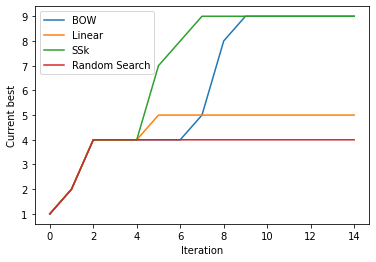

In [17]:
# plot results from 4 methods
# recall that first 5 points are a random sample shared by all the methods
plt.plot(-np.minimum.accumulate(bayesopt_loop_BOW.loop_state.Y),label="BOW")
plt.plot(-np.minimum.accumulate(bayesopt_loop_linear.loop_state.Y),label="Linear")
plt.plot(-np.minimum.accumulate(bayesopt_loop_SSK.loop_state.Y),label="SSk")
plt.plot(-np.minimum.accumulate(Y_random),label="Random Search")

plt.ylabel('Current best')
plt.xlabel('Iteration')
plt.legend()